# Activation Functions in Neural Networks

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

C:\miniconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from res.plot_lib import plot_data, plot_data_np, plot_model, set_default

In [3]:
# Initiale default plotting parameters
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

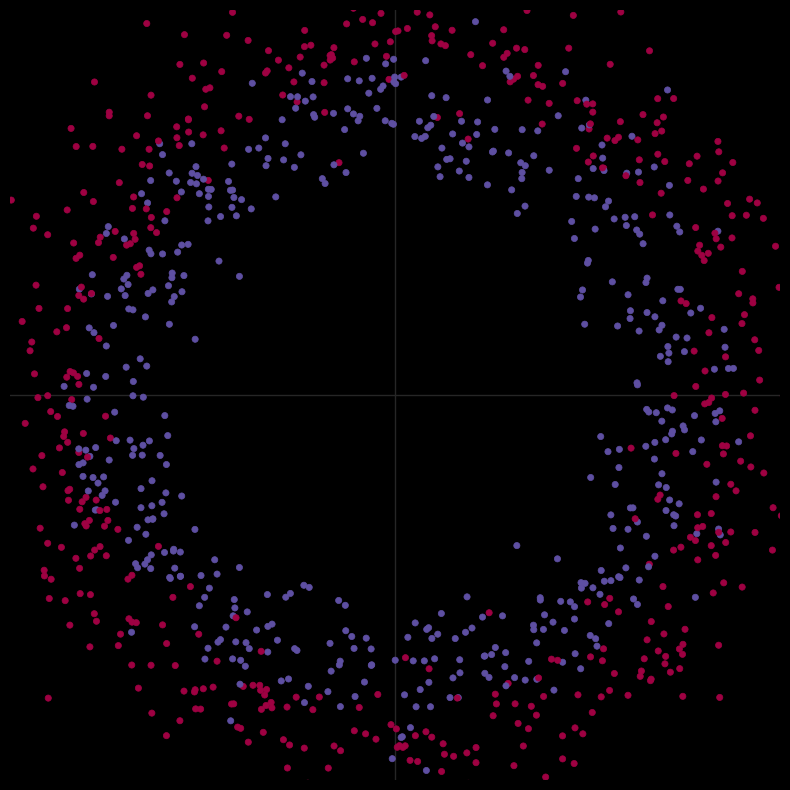

In [6]:
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
plot_data_np(X, y)

### Define a Linear Model

In [7]:
train_samples = 800

In [8]:
# from numpy to tensor
X_train, X_test = X[:train_samples, :], X[train_samples:, :]
y_train, y_test = y[:train_samples], y[train_samples:]

X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).long().to(device)

X_test = torch.from_numpy(X_test).float().to(device)
y_test = torch.from_numpy(y_test).long().to(device)

In [34]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

N = 1000  # num epochs
D = 2  # input dimensions
C = 2  # num classes
H = 10  # num_hidden_units

In [35]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) #Convert to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)


In [36]:
# Training
def train_model(model, X_train, y_train, X_test, y_test, criterion):
    loss_values_train = []
    acc_values_train = []
    acc_values_test = []
    for t in range(N):

        # Feed forward to get the logits
        y_pred = model(X_train)

        # Compute the loss and accuracy
        loss = criterion(y_pred, y_train)
        
        score, predicted = torch.max(y_pred, 1)
        acc = (y_train == predicted).sum().float() / len(y_train)
        
        # Test model
        acc_test = test_model(model, X_test, y_test)
        
        print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY TRAIN]: %.3f, \
              [ACCURACY TEST]: %.3f" % (t, loss.item(), acc, acc_test))
        display.clear_output(wait=True)
        
        # Save loss and acc values
        loss_values_train.append(loss.item())
        acc_values_train.append(acc.item())
        acc_values_test.append(acc_test.item())
        
        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()
    return loss_values_train, acc_values_train, acc_values_test

@torch.no_grad()
def test_model(model, X, y):
    # Feed forward to get the logits
    y_pred = model(X)
    # Get accuracy
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y) 
    return acc


In [37]:
l_val_train, acc_val_train, acc_val_test = train_model(model = model, 
                                                       X_train = X_train, y_train = y_train, 
                                                       X_test = X_test, y_test = y_test,
                                                       criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.692927, [ACCURACY TRAIN]: 0.495,               [ACCURACY TEST]: 0.465


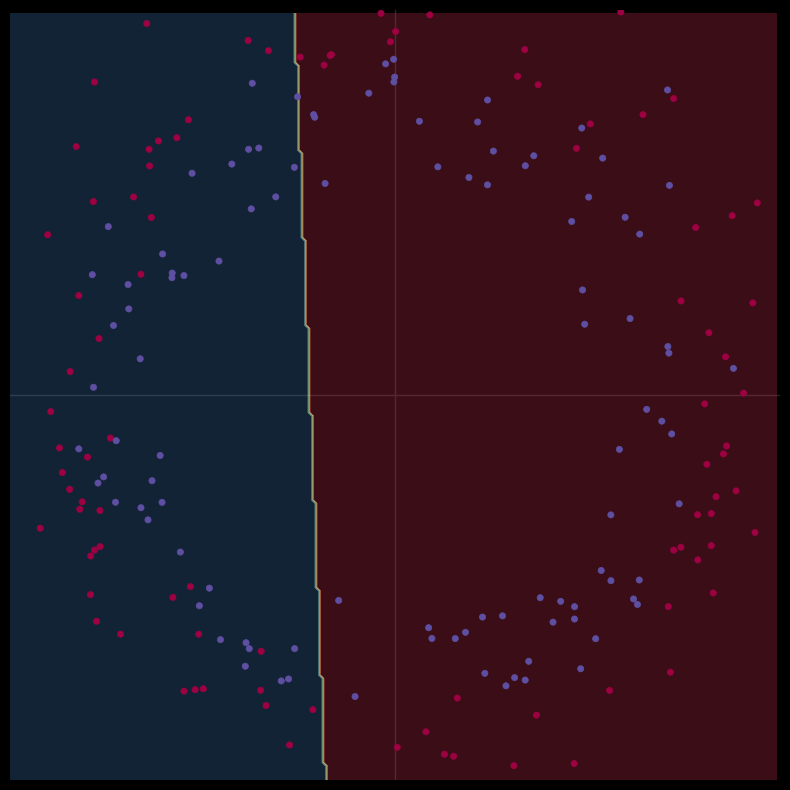

In [38]:
plot_model(X_test, y_test, model)

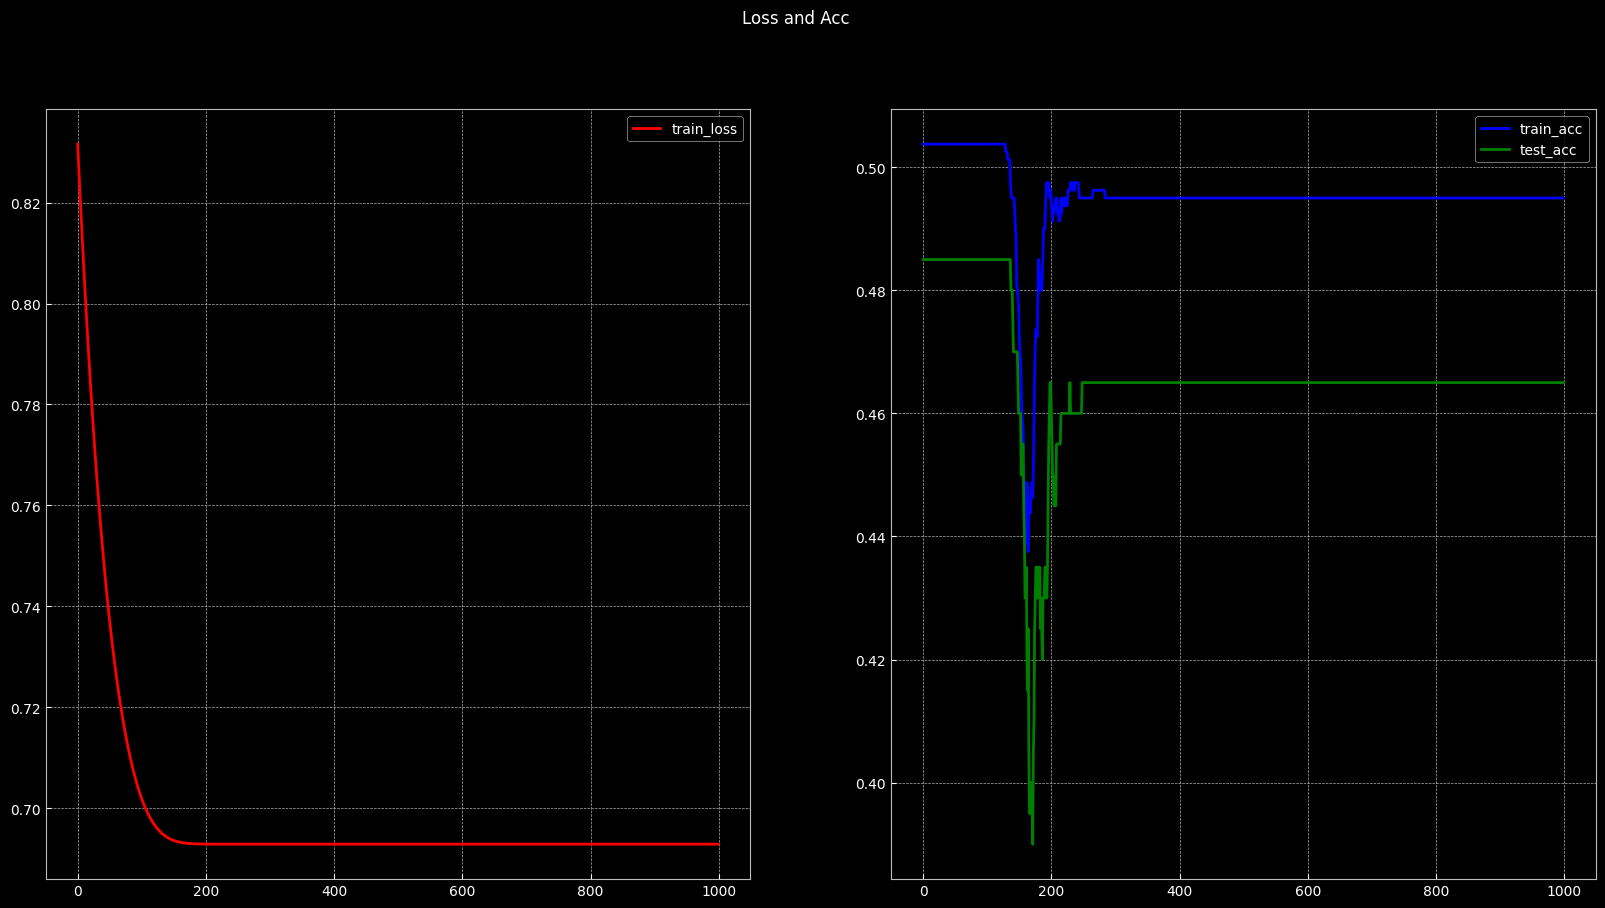

In [14]:
# Plot Loss and Acc
fig, (ax1, ax2) = pyplot.subplots(1, 2)
fig.set_size_inches(20, 10)
fig.suptitle('Loss and Acc')
ax1.plot(l_val_train, label='train_loss', color = 'red')
ax1.legend()
ax2.plot(acc_val_train, label='train_acc', color = 'blue')
ax2.plot(acc_val_test, label='test_acc', color = 'green')
ax2.legend()

### Add activation function

In [39]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# SGD for our parameter updates
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)

# Training
l_val_train, acc_val_train, acc_val_test = train_model(model = model, 
                                                       X_train = X_train, y_train = y_train, 
                                                       X_test = X_test, y_test = y_test,
                                                       criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.683930, [ACCURACY TRAIN]: 0.637,               [ACCURACY TEST]: 0.630


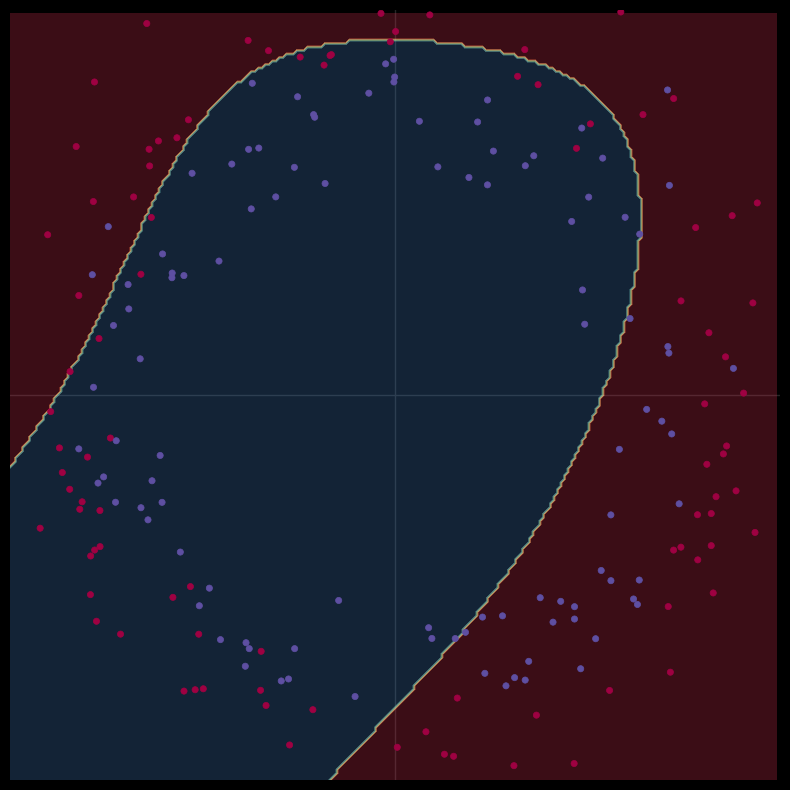

In [40]:
plot_model(X_test, y_test, model)

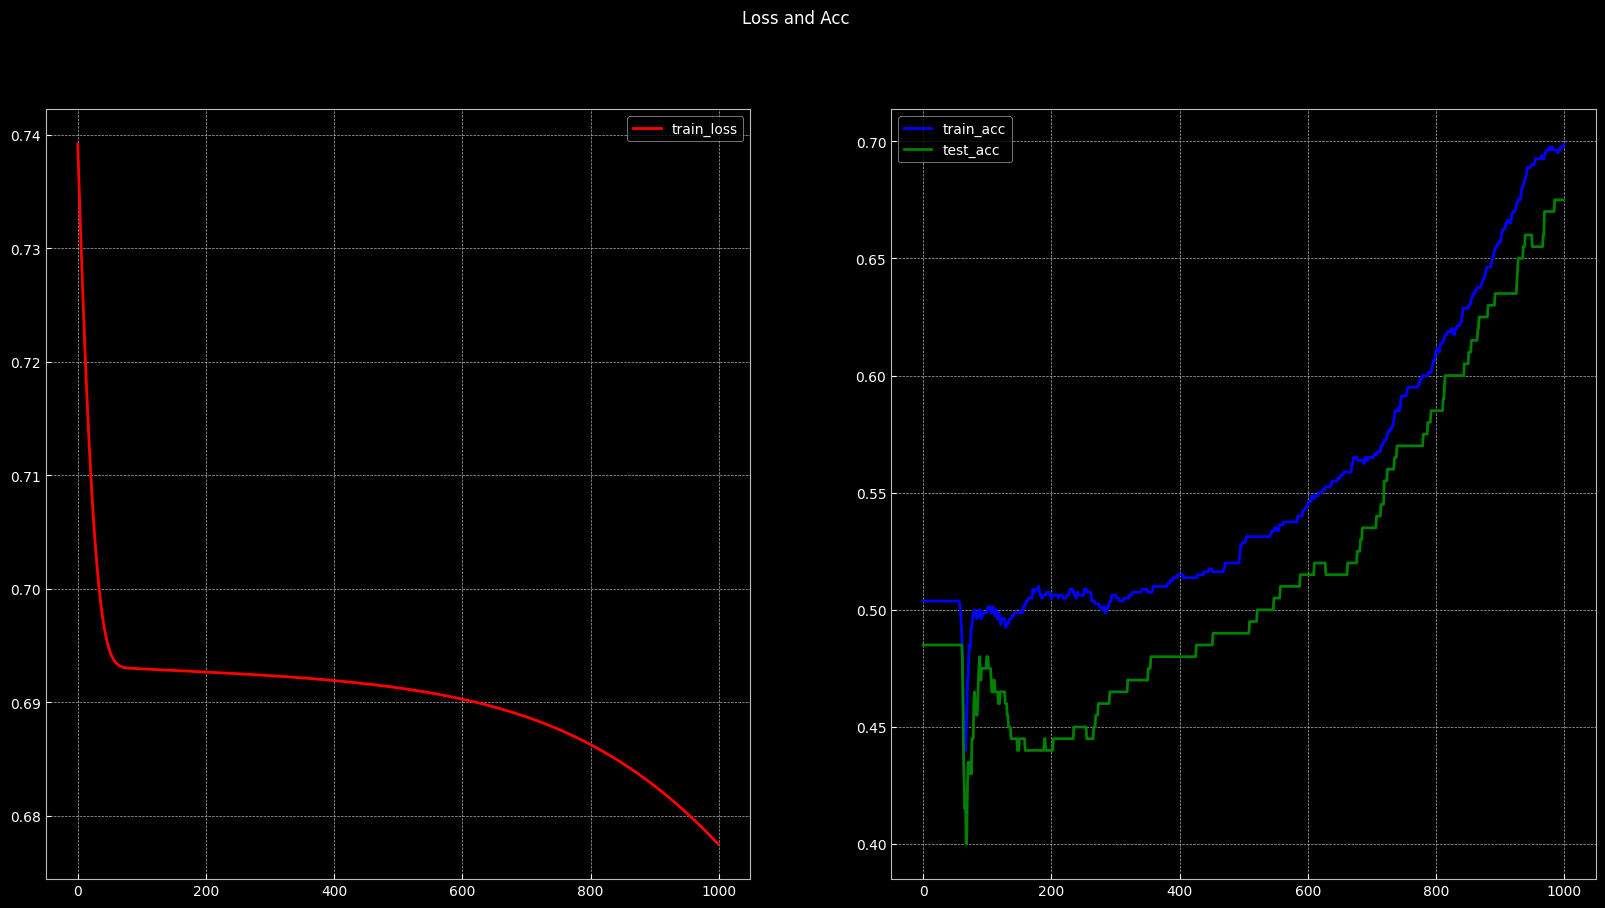

In [18]:
# Plot Loss and Acc
fig, (ax1, ax2) = pyplot.subplots(1, 2)
fig.set_size_inches(20, 10)
fig.suptitle('Loss and Acc')
ax1.plot(l_val_train, label='train_loss', color = 'red')
ax1.legend()
ax2.plot(acc_val_train, label='train_acc', color = 'blue')
ax2.plot(acc_val_test, label='test_acc', color = 'green')
ax2.legend()

In [46]:
# let's try a deeper model
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# SGD for our parameter updates
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)

# Training
l_val_train, acc_val_train, acc_val_test = train_model(model = model, 
                                                       X_train = X_train, y_train = y_train, 
                                                       X_test = X_test, y_test = y_test,
                                                       criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.556526, [ACCURACY TRAIN]: 0.699,               [ACCURACY TEST]: 0.670


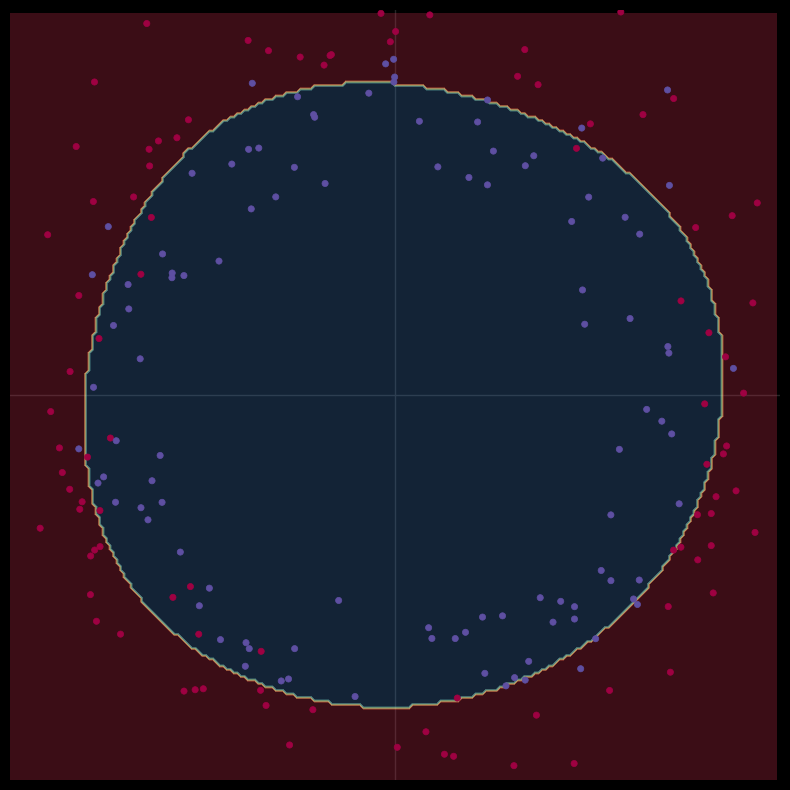

In [20]:
plot_model(X_test, y_test, model)

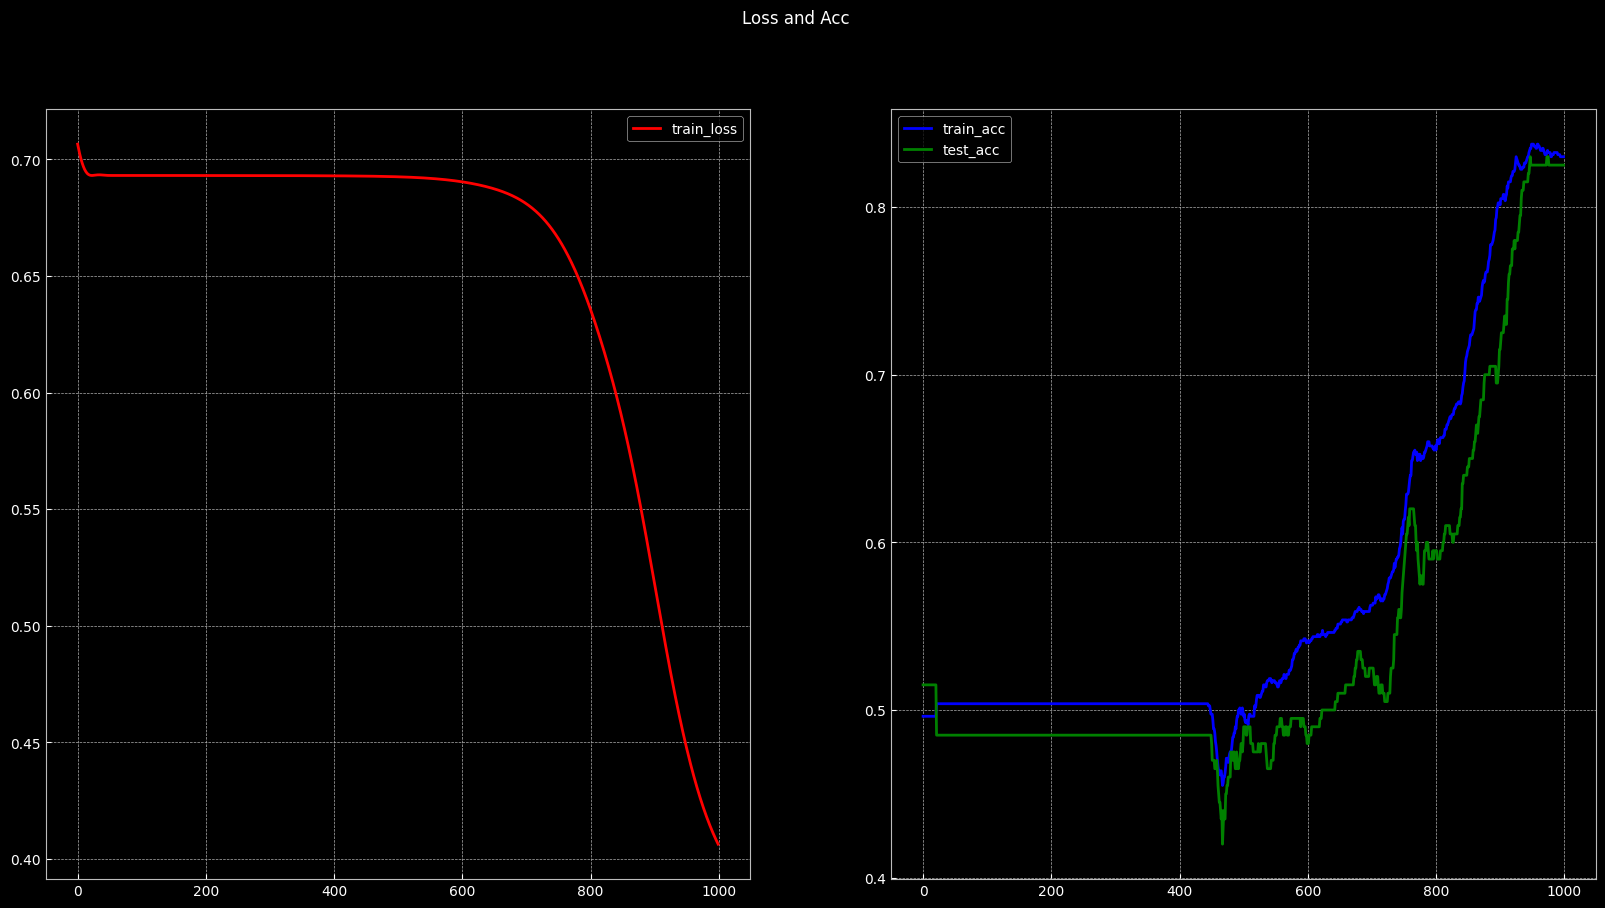

In [21]:
# Plot Loss and Acc
fig, (ax1, ax2) = pyplot.subplots(1, 2)
fig.set_size_inches(20, 10)
fig.suptitle('Loss and Acc')
ax1.plot(l_val_train, label='train_loss', color = 'red')
ax1.legend()
ax2.plot(acc_val_train, label='train_acc', color = 'blue')
ax2.plot(acc_val_test, label='test_acc', color = 'green')
ax2.legend()

In [47]:
# let's try RelU instead of Tanh
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# SGD for our parameter updates
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)

# Training
l_val_train, acc_val_train, acc_val_test = train_model(model = model, 
                                                       X_train = X_train, y_train = y_train, 
                                                       X_test = X_test, y_test = y_test,
                                                       criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.340718, [ACCURACY TRAIN]: 0.847,               [ACCURACY TEST]: 0.830


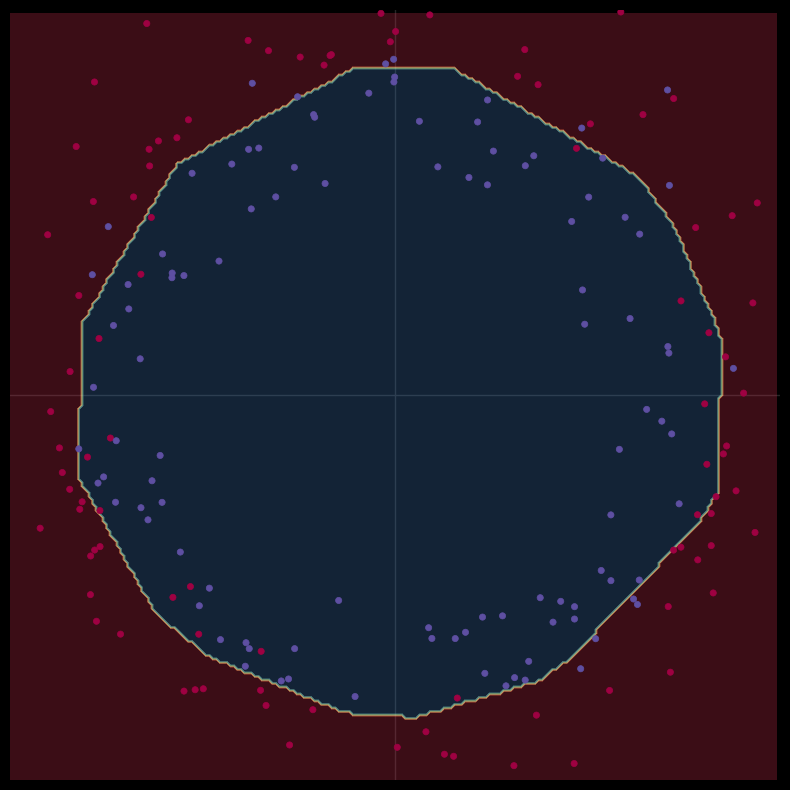

In [43]:
plot_model(X_test, y_test, model)

In [ ]:
# Plot Loss and Acc
fig, (ax1, ax2) = pyplot.subplots(1, 2)
fig.set_size_inches(20, 10)
fig.suptitle('Loss and Acc')
ax1.plot(l_val_train, label='train_loss', color = 'red')
ax1.legend()
ax2.plot(acc_val_train, label='train_acc', color = 'blue')
ax2.plot(acc_val_test, label='test_acc', color = 'green')
ax2.legend()